In [23]:
import docx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [24]:
def readtxt(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        tmp = para.text.split(",")
        fullText.append(tmp)
    fullText = fullText[2 : len(fullText) - 1]
    return fullText
dataset = readtxt("dataset_exam.docx")
for i in range(len(dataset)) :
    for j in range(len(dataset[0])) :
        dataset[i][j] = float(dataset[i][j])
dataset = np.array(dataset)

In [25]:
X = dataset[ : , : -1]
X_0 = np.ones((X.shape[0], 1))
X = np.hstack((X_0, X))
mean_col = np.mean(X, axis=0)
std_col = np.std(X, axis=0)
for i in range(1, X.shape[1]) :
    for j in range(X.shape[0]) :
        X[j][i] = X[j][i] - mean_col[i]
        X[j][i] = X[j][i] / std_col[i]
y = dataset[ : , -1]

In [26]:
train_size = int((X.shape[0] * 3) / 4)
X_train_indices = random.sample(range(0, 100), train_size)
X_train, X_test, y_train, y_test = [], [], [], []
for i in range(X.shape[0]) :
    if(i in X_train_indices) :
        X_train.append(X[i])
        y_train.append(y[i])
    else :
        X_test.append(X[i])
        y_test.append(y[i])    
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [27]:
m = float(X_train.shape[0])
feature_count = (X_train.shape[1])
lambda_reg = 0.03
error_threshold = 0.0000001
theta = np.random.uniform(-1, 1, feature_count)
iterations = 0

In [28]:
def sigmoid(x) :
    return 1.0 / (1.0 + np.exp(-x))
def net_input(X) :
    return np.dot(X, theta)
def cost_function_reg(X, y) :
    val1 = np.dot(np.transpose(y), np.log(sigmoid(net_input(X))))
    val2 = np.dot(np.transpose(1.0 - y), np.log(1.0 - sigmoid(net_input(X))))
    val3 = (lambda_reg / (2.0 * m)) * (sum(np.square(theta[1:])))
    return (-1.0 / m) * (val1 + val2) + val3
def gradient_calc(X, y) :
    val1 = (1 / m) * np.dot(np.transpose(X), (sigmoid(net_input(X)) - y))
    val2 = np.zeros(theta.shape)
    val2[1 : ] = (lambda_reg / m) * theta[1 : ]
    return val1 + val2
def double_grad_calc(X, y) :
    S = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]) :
        S[i][i] = sigmoid(net_input(X[i])) * (1 - sigmoid(net_input(X[i])))    
    val1 = np.dot(np.dot(np.transpose(X), S), X)
    val2 = np.zeros((X.shape[1], X.shape[1]))
    for i in range(1, X.shape[1]) :
        val2[i][i] = lambda_reg
    return val1 + val2
def newton_method(X, y) :
    cost_vals = [cost_function_reg(X, y)]
    iterations = [1]  
    iteration_count = 2
    flag = 0
    global theta
    while True:
        second_derivative = double_grad_calc(X, y)
        first_derivative = gradient_calc(X, y)
        theta = theta - np.dot(np.linalg.inv(second_derivative), first_derivative)
        current_cost = cost_function_reg(X, y)
        iterations.append(iteration_count)
        cost_vals.append(current_cost)
        prev_cost = cost_vals[iteration_count - 2]
        if(flag == 0) :
            flag = 1
        else :
            tmp = np.absolute(first_derivative - prev_derivative)
            if(tmp.all() <= error_threshold) :
                break
        prev_derivative = first_derivative
        iteration_count += 1
    print("Total iterations taken: ", iteration_count)
    plt.plot(iterations, cost_vals)

Total iterations taken:  2299
Final error values training newton :  0.15975354575107556
Final theta values training newton :  [2.49175168 4.34578842 5.13252527]


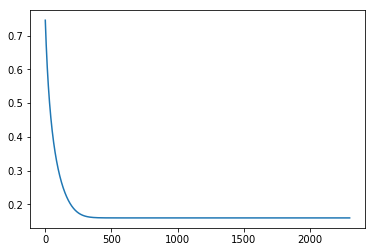

In [29]:
theta = np.random.uniform(-1, 1, feature_count)
newton_method(X_train, y_train)
print("Final error values training newton : ", cost_function_reg(X_train, y_train))
print("Final theta values training newton : ", theta)

In [30]:
x_admitted_vals = []
x_n_admitted_vals = []
y_admitted_vals = []
y_n_admitted_vals = []
for i in range(int(m)) :
    if(y_train[i] == 1.0) :
        x_admitted_vals.append(X_train[i][1])
        y_admitted_vals.append(X_train[i][2])
    else :
        x_n_admitted_vals.append(X_train[i][1])
        y_n_admitted_vals.append(X_train[i][2])

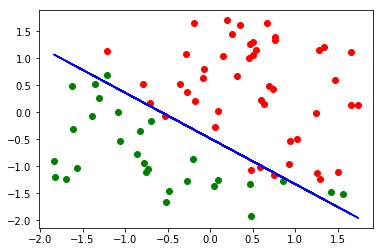

In [31]:
decision_x_vals = X_train[: , 1]
decision_y_vals = -1.0 * ((theta[0] + theta[1] * decision_x_vals) / (theta[2]))
plt.plot(x_admitted_vals, y_admitted_vals, 'ro')
plt.plot(x_n_admitted_vals, y_n_admitted_vals, 'go')
plt.plot(decision_x_vals, decision_y_vals, 'b')

In [32]:
total_correct = 0
train_data_evaluated_vals = sigmoid(net_input(X_train))
for i in range(len(X_train)) :
    if(y_train[i] == 1 and train_data_evaluated_vals[i] >= 0.5) :
        total_correct = total_correct + 1
    elif(y_train[i] == 0 and train_data_evaluated_vals[i] < 0.5) :
        total_correct = total_correct + 1
print('% accuracy for train data is ', (total_correct / X_train.shape[0]) * 100)

% accuracy for train data is  90.66666666666666


In [33]:
total_correct = 0
test_data_evaluated_vals = sigmoid(net_input(X_test))
for i in range(len(X_test)) :
    if(y_test[i] == 1 and test_data_evaluated_vals[i] >= 0.5) :
        total_correct = total_correct + 1
    elif(y_test[i] == 0 and test_data_evaluated_vals[i] < 0.5) :
        total_correct = total_correct + 1

print('% accuracy for test data is ', (total_correct / X_test.shape[0]) * 100)

% accuracy for test data is  84.0
